In [58]:
# 박조은 강사님의 edwith 부스트코스의 데이터분석 강의를 보고 필사한 것이며
# 알게 된 점이나 느낀 점등을 옆에 주석으로 달아놓은 자료 입니다. 

# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

# 데이터 불러오고 데이터파악 및 결측치 파악

In [2]:
df=pd.read_csv('C:/Users/inha/Desktop/건강검진정보(2017).csv',encoding='cp949') #encoding은 cp949
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,NaN,NaN,NaN,NaN,2.0,20181126
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126


In [3]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,27.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,1,11,41,160,70,90.5,1.0,1.5,...,36.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [4]:
df.shape  #백만개의 행 34개의 열 

(1000000, 34)

In [5]:
df.columns #feature column들 확인 

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [7]:
# 내가 분석하고자 하는 부분을 제외한 feature들 제거하기....
#치아우식증유무, 결손치유무, 치아마모증유무,제3대구치(사랑니)이상 은 아예 다 없으니까 제거

In [8]:
df.describe() 

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,999734.000000,999817.000000,999811.000000,...,999958.000000,999856.000000,999464.000000,1000000.000000,0.0,0.0,0.0,0.0,400523.000000,1000000.0
mean,2017.0,500000.500000,1.469590,10.527041,33.694584,162.22823,63.268710,81.231603,0.980478,0.978032,...,37.184273,1.607704,0.499293,0.400523,NaN,NaN,NaN,NaN,0.602130,20181126.0
std,0.0,288675.278933,0.499075,2.841183,12.672969,9.28462,12.520732,11.837625,0.608810,0.607122,...,50.624330,0.818454,0.500000,0.490005,NaN,NaN,NaN,NaN,0.590891,0.0
min,2017.0,1.000000,1.000000,5.000000,11.000000,130.00000,25.000000,8.000000,0.100000,0.100000,...,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
25%,2017.0,250000.750000,1.000000,8.000000,27.000000,155.00000,55.000000,74.100000,0.700000,0.700000,...,16.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,20181126.0
50%,2017.0,500000.500000,1.000000,10.000000,41.000000,160.00000,60.000000,81.000000,1.000000,1.000000,...,23.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
75%,2017.0,750000.250000,2.000000,13.000000,43.000000,170.00000,70.000000,87.800000,1.200000,1.200000,...,39.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,20181126.0
max,2017.0,1000000.000000,2.000000,18.000000,50.000000,190.00000,140.000000,999.000000,9.900000,9.900000,...,999.000000,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,20181126.0


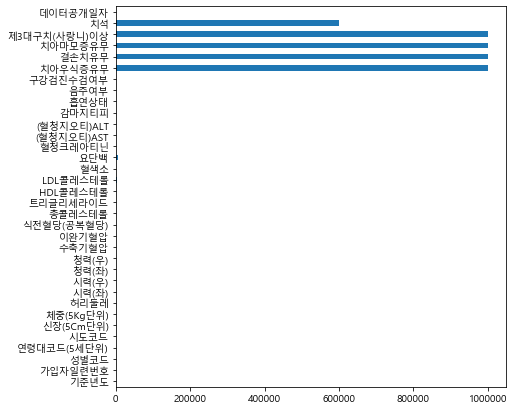

In [9]:
df.isnull().sum().plot.barh(figsize=(7,7))   #결측치 시각화

In [10]:
df[['(혈청지오티)AST' ,'(혈청지오티)ALT']].head()

,(혈청지오티)AST,(혈청지오티)ALT
0,21.0,35.0
1,20.0,36.0
2,47.0,32.0
3,29.0,34.0
4,19.0,12.0


In [11]:
df['성별코드'].value_counts()  #카테고리 데이터나 텍스트 데이터의 빈도수 체킹 value_counts

# 남성>여성

1    530410
2    469590
Name: 성별코드, dtype: int64

# groupby 와 pivot table로 데이터 요약

##  groupby와 pivot_table 거의 비슷함 둘중 편한거 쓰자 그냥

In [12]:
df.groupby(['성별코드','음주여부'])['가입자일련번호'].agg(['count','mean','median'])     
#성별코드, 음주여부로 그룹호해서 가입자일련번호 count,mean ,median
# agg는 한번에 여러가지 항목을 groupby화 해서 파악할 수 있음.

count           mean    median
성별코드 음주여부                                 
1    0.0   173612  498785.357003  497776.5
     1.0   356587  500069.773329  499941.0
2    0.0   326827  500230.859675  501064.0
     1.0   142438  500755.196703  500323.5

In [13]:
df.groupby(['성별코드','음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [14]:
# pivot은 연산은 하지않고 형태만 볼떄 pivot_table은 형태도 보고 연산도 할때
df.pivot_table(index='음주여부',values='가입자일련번호',aggfunc='count')  
#index에 적은값이 인덱스가 되고 values에 보고자 하는값들 aggfunc의 default는 count

,가입자일련번호
음주여부,
0.0,500439
1.0,499025


# 전체 데이터 시각화하기 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC33E59E88>,
      dtype=object)

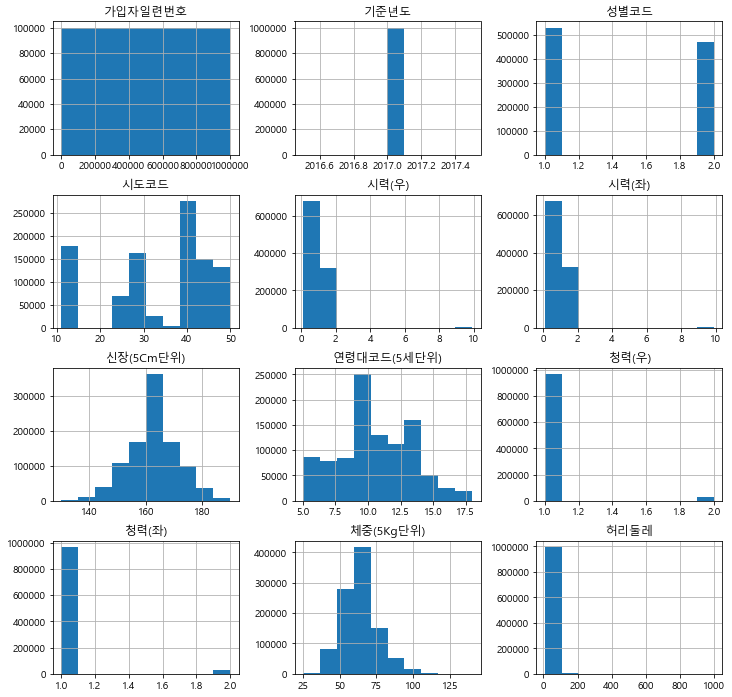

In [15]:
a=df.iloc[:,:12].hist(figsize=(12,12))
a

In [16]:
df_sample=df.sample(1000,random_state=1)

# 범주형(카테고리) 데이터 시각화 범주형은 보통 문자형

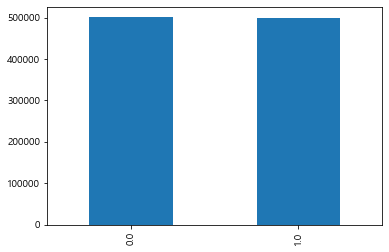

In [17]:
df['음주여부'].value_counts().plot.bar()

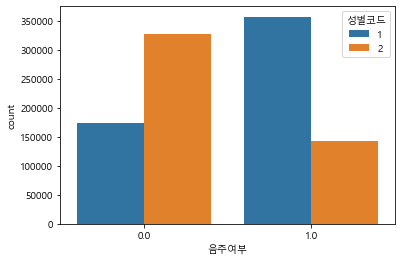

In [18]:
sns.countplot(x='음주여부',data=df,hue='성별코드') #성별코드로 색상을 구분해 음주여부를 구분함

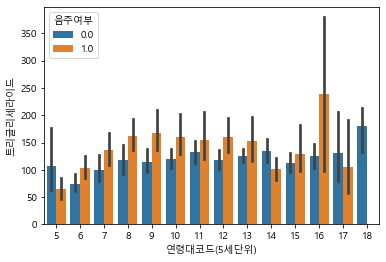

In [19]:
sns.barplot(data=df_sample,x='연령대코드(5세단위)',y='트리글리세라이드',hue='음주여부')

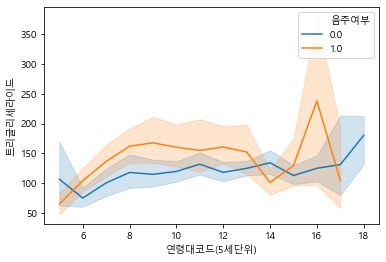

In [20]:
sns.lineplot(data=df_sample,x='연령대코드(5세단위)',y='트리글리세라이드',hue='음주여부')

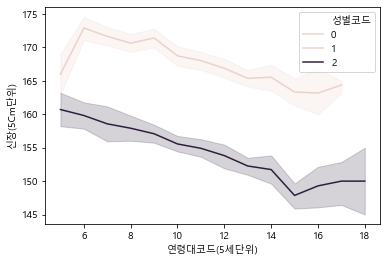

In [21]:
sns.lineplot(data=df_sample,x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별코드')

## boxplot : 이상치, 1사분위 3사분위 등을 알 수 있어서 분석시 좋음

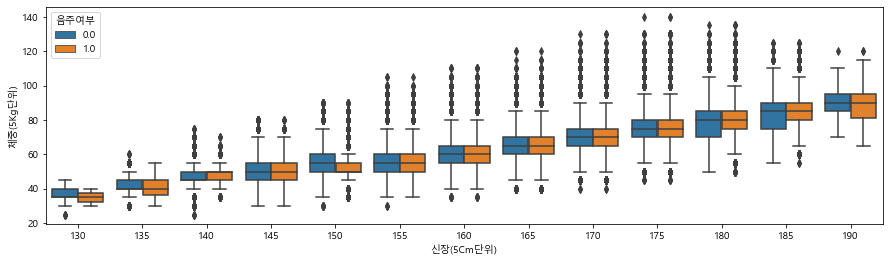

In [22]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df,x='신장(5Cm단위)',y='체중(5Kg단위)',hue='음주여부')

# 수치형 데이터 시각화

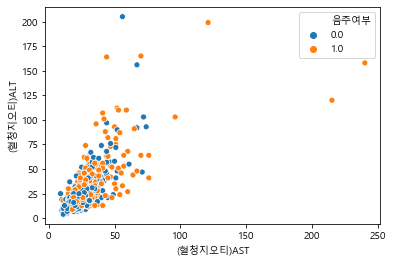

In [30]:
sns.scatterplot(data=df_sample,x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부')

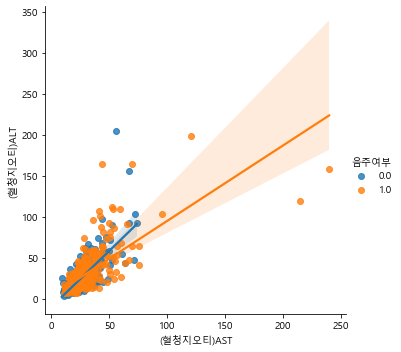

In [31]:
sns.lmplot(data=df_sample,x='(혈청지오티)AST',y='(혈청지오티)ALT',hue='음주여부')  #lmplot은 상관관계를 나타내줌

In [55]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

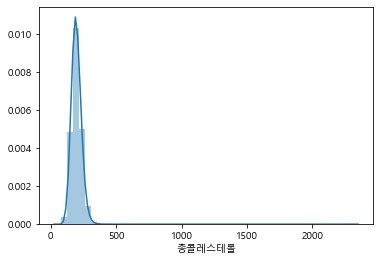

In [57]:
sns.distplot(df['총콜레스테롤'])  #값이 얼마나 치우쳐져 있는지 등을 파악 가능

# 상관관계 구하기

In [62]:
#우리가 상관관계를 분석하고자 하는 columns들만 넣기
columns=['연령대코드(5세단위)','체중(5Kg단위)','신장(5Cm단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
    '수축기혈압','이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
    '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', ]  
columns

['연령대코드(5세단위)',
 '체중(5Kg단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

# +- 0.3~0.7 뚜렷한 선형관계  0.7이상일시 강한 선형관계

In [66]:
df_small=df_sample[columns]
df_corr=df_small.corr()
df_corr

,연령대코드(5세단위),체중(5Kg단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
연령대코드(5세단위),1.000000,-0.200336,-0.380239,0.159797,-0.217613,-0.308829,0.233960,0.264549,0.222408,0.091006,...,-0.095972,0.008560,-0.178977,0.058702,0.044958,0.129357,-0.009871,-0.015357,-0.121132,-0.275285
체중(5Kg단위),-0.200336,1.000000,0.665067,0.785950,0.122194,0.168929,-0.043727,-0.047717,0.288983,0.324783,...,-0.330577,0.043839,0.540191,0.012154,0.170468,0.193976,0.401756,0.246924,0.392874,0.290207
신장(5Cm단위),-0.380239,0.665067,1.000000,0.312230,0.202426,0.236260,-0.064044,-0.074738,0.063929,0.157810,...,-0.207537,0.008146,0.541155,-0.007699,0.212811,0.055783,0.159199,0.185091,0.512294,0.410946
허리둘레,0.159797,0.785950,0.312230,1.000000,0.017355,0.030809,0.050644,0.073086,0.349219,0.329256,...,-0.311478,0.017287,0.377673,0.045948,0.131421,0.253549,0.407063,0.234831,0.246296,0.134891
시력(좌),-0.217613,0.122194,0.202426,0.017355,1.000000,0.346265,-0.039499,-0.081000,-0.012888,0.027854,...,-0.045579,-0.052768,0.142582,-0.024741,0.022175,0.011212,0.080793,0.111903,0.141441,0.081130
시력(우),-0.308829,0.168929,0.236260,0.030809,0.346265,1.000000,-0.072118,-0.102880,-0.036395,0.001282,...,-0.068572,0.003336,0.190303,-0.024977,0.080797,0.003236,0.123455,0.035304,0.089486,0.158678
청력(좌),0.233960,-0.043727,-0.064044,0.050644,-0.039499,-0.072118,1.000000,0.565295,0.039115,-0.015526,...,-0.047898,0.006018,-0.000433,0.041231,0.016792,0.020671,0.044048,-0.025004,0.007413,-0.053293
청력(우),0.264549,-0.047717,-0.074738,0.073086,-0.081000,-0.102880,0.565295,1.000000,0.056661,-0.005658,...,-0.069527,-0.032362,-0.050208,0.081749,0.017758,-0.004681,-0.019893,-0.024936,-0.042159,-0.072404
수축기혈압,0.222408,0.288983,0.063929,0.349219,-0.012888,-0.036395,0.039115,0.056661,1.000000,0.751731,...,-0.093036,-0.007070,0.169241,0.043110,0.034018,0.133472,0.163762,0.191333,0.094145,0.042372
이완기혈압,0.091006,0.324783,0.157810,0.329256,0.027854,0.001282,-0.015526,-0.005658,0.751731,1.000000,...,-0.091701,0.038887,0.255690,0.035826,0.081965,0.131482,0.191155,0.200150,0.144974,0.108679


In [69]:
df_corr['신장(5Cm단위)']  #키에대한 상관관계 파악

연령대코드(5세단위)   -0.380239
체중(5Kg단위)      0.665067
신장(5Cm단위)      1.000000
허리둘레           0.312230
시력(좌)          0.202426
시력(우)          0.236260
청력(좌)         -0.064044
청력(우)         -0.074738
수축기혈압          0.063929
이완기혈압          0.157810
식전혈당(공복혈당)     0.005997
총콜레스테롤        -0.004133
트리글리세라이드       0.135087
HDL콜레스테롤      -0.207537
LDL콜레스테롤       0.008146
혈색소            0.541155
요단백           -0.007699
혈청크레아티닌        0.212811
(혈청지오티)AST     0.055783
(혈청지오티)ALT     0.159199
감마지티피          0.185091
흡연상태           0.512294
음주여부           0.410946
Name: 신장(5Cm단위), dtype: float64

## 상관관계는 히트맵으로 표시하는게 눈에도 들어오고 좋음

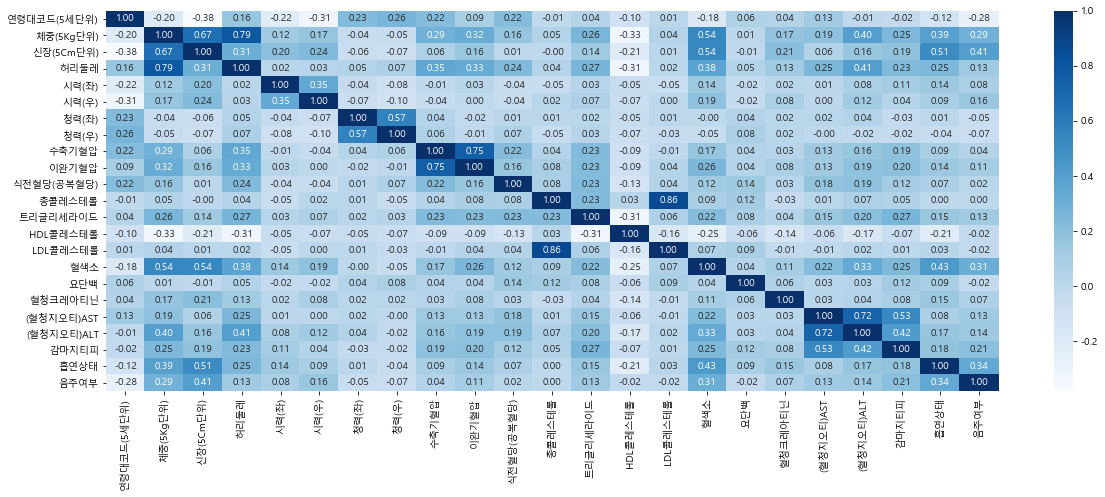

In [76]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr,annot=True,fmt='.2f',cmap='Blues')  #annot은 안에 숫자 써주는것이고 cmap Blues로 해주면 색상&짙어질수록 큰 수